# HW1 - Sampling Distributions

In order to understand measurement, you need to understand statistics. In order to understand statistics, you must understand sampling distributions.

Before you begin, answer the following questions:
1. When you run a correlaton and get a _p_-value associated with it, what does that *p*-value tell you?
    - **The _p_-value tells us whether the correlation between two measured variables are significantly different from 0 (i.e., no linear relationship)**
    

2. What is the null hypothesis when testing a correlation for significance?
    - **The null hypothesis is that there is a not a significant linear relationship between the measured variables**

We are going to manually compute us some *p*-values! Whaa-whoo!

The R file below is heavily annotated and will simulate data for two independent variables for a sample of *N* = 20. The program then calculates the correlation between these variables and outputs this number. The program does this 1000 times and writes all 1000 correlations to a data object.

So basically, the program creates data which, in the population, there is no correlation between variables. However, in any one SAMPLE, there will be some correlation. This is because of sampling error! The smaller your sample, the more likely you are to see rather large correlations by chance alone.

So basically, the program creates data which, in the population, there is no correlation between variables. However, in any one SAMPLE, there will be some correlation. This is because of sampling error! The smaller your sample, the more likely you are to see rather large correlations by chance alone.

Your goal is to complete the table below to indicate what % of the correlations of the 1000 were larger than the correlation value listed in the table. You'll need to modify the R program to determine the effect of sample size. Thus, you should have run a total of 3 different R programs, each differing only by the size of the samples. Each output file you create should contain 1000 correlations. Be sure to export your R program via HTML as you did with the first assignment.

In [3]:
#keep packages quiet!
shhh = function(...) {
  suppressPackageStartupMessages(base::library(...))
}

In [4]:
#create a function
samp_distFunc = function(n_size = NULL){
    shhh(psych)
    
    corrDat = NULL
    
    for (i in 1:1000){
        
        if (is.double(n_size) == T){
            x <- rnorm(mean = 0, sd = 1, n = n_size)
            y <- rnorm(mean = 0, sd = 1, n = n_size)
        } else {
            stop("Not a number!")
        }
        
        dat = data.frame(x, y)
        r = with(dat, cor(x, y))
        
        corrDat = matrix(append(corrDat, r))
        #colnames(corrDat) <- "corrs"
    }
    return(corrDat)
}

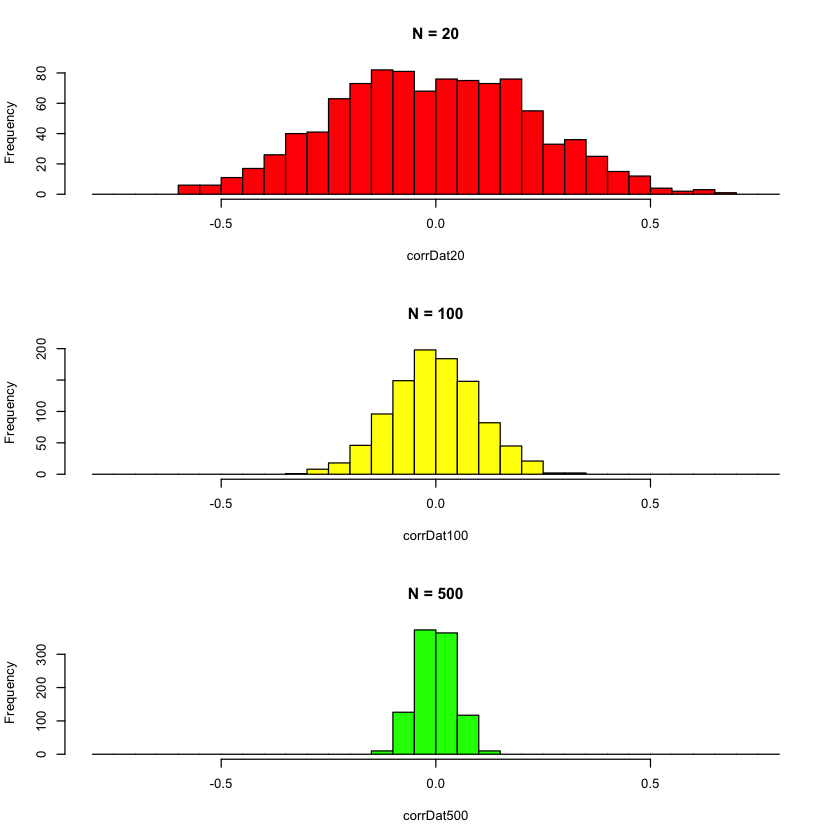

In [5]:
#create separate dfs
corrDat20 = samp_distFunc(n_size = 20)
corrDat100 = samp_distFunc(n_size = 100)
corrDat500 = samp_distFunc(n_size = 500)

#combind all corr dfs
corrDatdf = cbind.data.frame(corrDat20, corrDat100, corrDat500)

#grid parameters
par(mfrow = c(3, 1))

#histograms
hist(corrDat20, main = "N = 20", breaks = seq(-.8, .8, .05), col = "red")
hist(corrDat100, main = "N = 100", breaks = seq(-.8, .8, .05), col = "yellow")
hist(corrDat500, main = "N = 500", breaks = seq(-.8, .8, .05), col = "green")

#one liner - not as pretty!
#lapply(list(corrDat20, corrDat100, corrDat500), hist)[1]["histogram"]

3. What percentage of the 1000 samples did you see correlations bigger than those in the table below, given the sample sizes below? Copy and paste this table into Word, complete the % samples column, and save.

In [87]:
shhh(tidyverse)
shhh(eeptools) #used for percent symbols

table1 = data.frame(x = rep(seq(.1, .5, by = .2), 3), 
                    y = rep(c(20, 100, 500), each = 3), 
                    z = rep(NA, 9))

#fill in the z column with appropriate values
table1[1, 3] = nrow(dplyr::filter(data.frame(corrDat20), corrDat20 > .1)) / 1000 * 100
table1[2, 3] = nrow(dplyr::filter(data.frame(corrDat20), corrDat20 > .3)) / 1000 * 100
table1[3, 3] = nrow(dplyr::filter(data.frame(corrDat20), corrDat20 > .5)) / 1000 * 100
table1[4, 3] = nrow(dplyr::filter(data.frame(corrDat100), corrDat100 > .1)) / 1000 * 100
table1[5, 3] = nrow(dplyr::filter(data.frame(corrDat100), corrDat100 > .3)) / 1000 * 100
table1[6, 3] = nrow(dplyr::filter(data.frame(corrDat100), corrDat100 > .5)) / 1000 * 100
table1[7, 3] = nrow(dplyr::filter(data.frame(corrDat500), corrDat500 > .1)) / 1000 * 100
table1[8, 3] = nrow(dplyr::filter(data.frame(corrDat500), corrDat500 > .3)) / 1000 * 100
table1[9, 3] = nrow(dplyr::filter(data.frame(corrDat500), corrDat500 > .5)) / 1000 * 100

table1 %>%
    mutate(z = as.character(z), 
           z = paste(z, "%", sep = "")) %>%
    rename("Corrs >" = x, "Sample size" = y, "% of sample" = z)

Corrs >,Sample size,% of sample
<dbl>,<dbl>,<chr>
0.1,20,33.5%
0.3,20,9.8%
0.5,20,1%
0.1,100,15.2%
0.3,100,0.2%
0.5,100,0%
0.1,500,1%
0.3,500,0%
0.5,500,0%


In [88]:
#descriptive stats
desc_stats = lapply(list(corrDat20, corrDat100, corrDat500), describe)
#desc_stats

table2 = data.frame("Sample_size" = c(20, 100, 500), 
                    "Mean_1000_corrs" = c(mean(corrDat20), mean(corrDat100), 
                                          mean(corrDat500)), 
                    "SD_1000_corrs" = c(sd(corrDat20), sd(corrDat100), sd(corrDat500))
                   )
round(table2, 4)

Sample_size,Mean_1000_corrs,SD_1000_corrs
<dbl>,<dbl>,<dbl>
20,-0.0076,0.2288
100,-0.0026,0.1017
500,-0.0009,0.0440


*Note:* Everyone in class will get different (but similar) answers given that we are all using different random numbers.